In [ ]:
import random
import string
from Crypto.Util.number import isPrime

BLOCK_LEN = 129
CHARSET = string.ascii_uppercase + string.ascii_lowercase + string.digits
users, pwd_hashes = {}, []
allowed_blocks = []

q1 = 57895665874783536962369408363969823887021530656373208299565102620846005563716018275834077962292286213472570266375824572745671541793458387390711613089471407869558363212866932533545785125988453002675479793768261480181947144057144941974626043243654731721303589851520175899531854692118423229594279209070187162279
p1 = 2 * q1 + 1
g1 = 2
assert isPrime(p1)
assert isPrime(q1)
assert pow(g1, q1, p1) == 1
x1 = random.randint(1, 2 ** 256)
y1 = pow(g1, x1, p1)

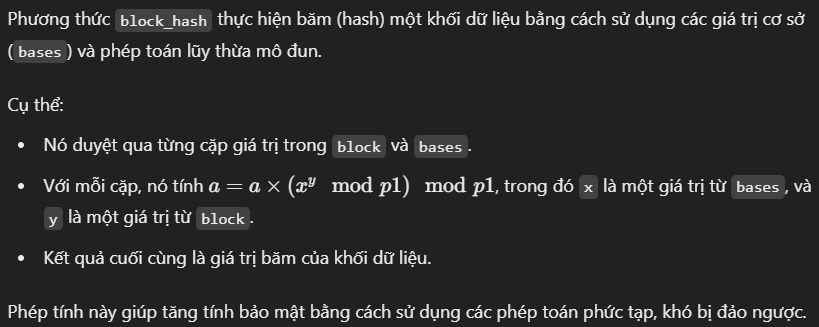

In [ ]:

def block_hash(block, bases, a):
    for x, y in zip(bases, block):
        a = a * pow(x, y, p1) % p1
    return a


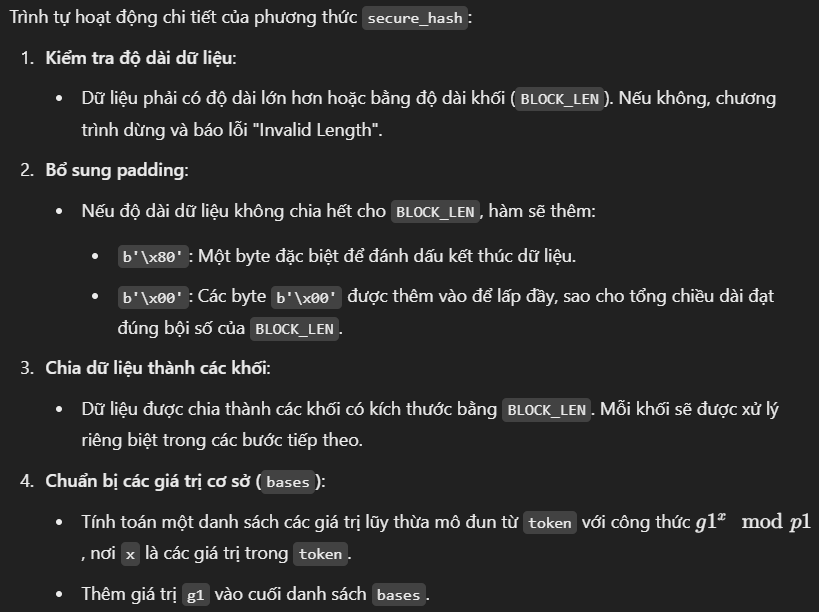
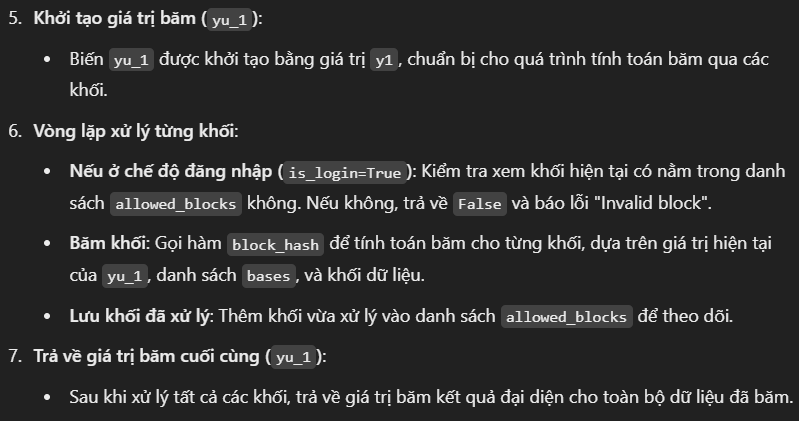

In [ ]:

def secure_hash(data, token, is_login = False):
    assert len(data) + 1 >= BLOCK_LEN, "Invalid Length"
    
    if len(data) % BLOCK_LEN != 0:
        data += b'\x80'
        data += b'\x00' * (BLOCK_LEN - len(data) % BLOCK_LEN - 1)
        
    blocks = [data[i:i + BLOCK_LEN] for i in range(0, len(data), BLOCK_LEN)]
    bases = [pow(g1, x, p1) for x in token] + [g1]
    yu_1 = y1
    
    for block in blocks:
        if is_login:
            if block not in allowed_blocks:
                print("Invalid block")
                return False
        yu_1 = block_hash(block, bases, yu_1)
        allowed_blocks.append(block)
    
    return yu_1



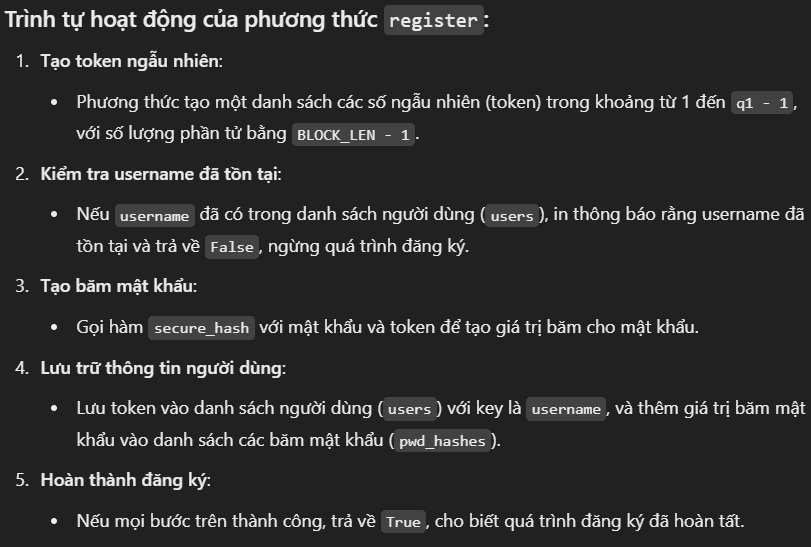

In [ ]:
def register(username, password):
    token = [random.randint(1, q1 - 1) for _ in range(BLOCK_LEN - 1)]
    if username in users:
        print("Username already exists")
        return False
    pwd_hash = secure_hash(password, token)
    users[username] = token
    pwd_hashes.append(pwd_hash)
    return True


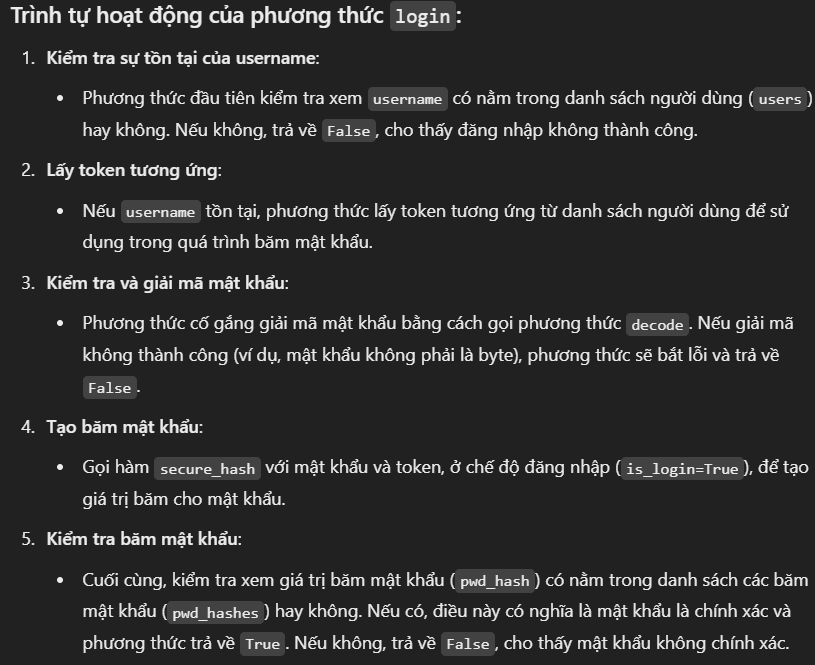

In [ ]:
def login(username, password):
    if username not in users:
        return False
    token = users[username]
    try:
        password.decode()
    except:
        return False
    pwd_hash = secure_hash(password, token, True)
    return pwd_hash in pwd_hashes

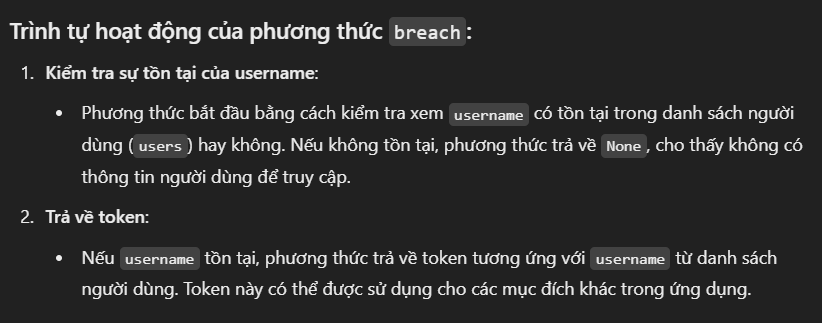
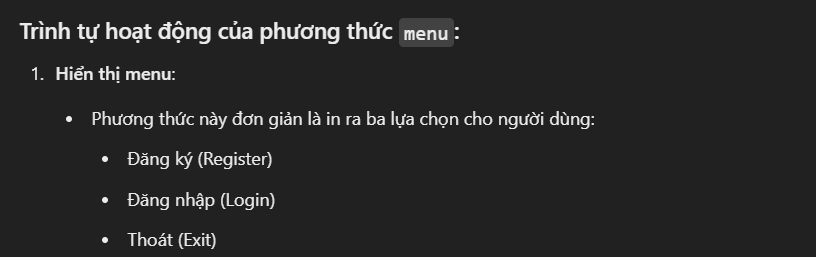

In [ ]:
def breach(username):
    if username not in users:
        return None
    return users[username]

def menu():
    print("1. Register")
    print("2. Login")
    print("3. Exit")

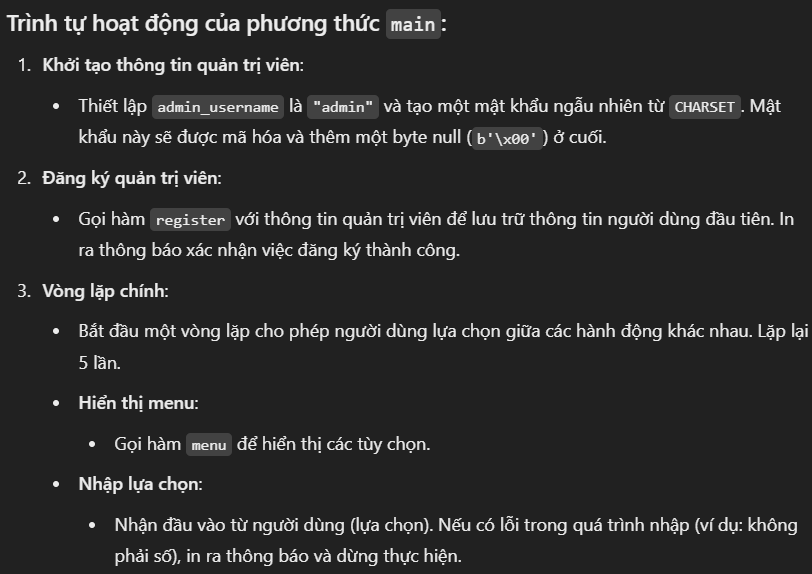
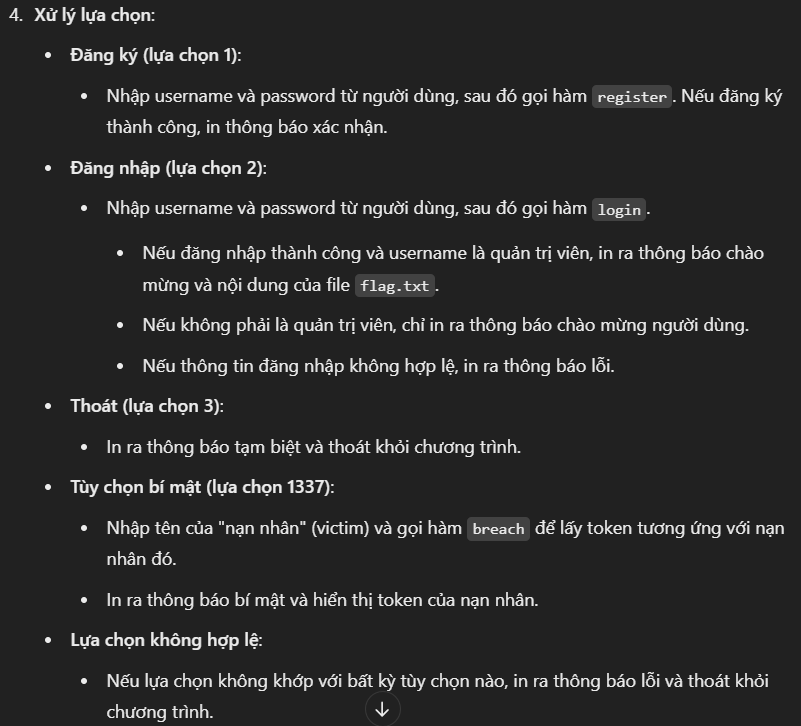


In [ ]:
def main():
    admin_username = "admin"
    admin_password = ''.join(random.choices(CHARSET, k = BLOCK_LEN - 1)).encode() + b'\x00'
    register(admin_username, admin_password)
    print(f'User {admin_username} registered successfully')
    for _ in range(5):
        try:
            menu()
            choice = int(input("> "))
        except:
            print("No No No No")
            return
        if choice == 1:
            username = input("Enter username: ")
            password = bytes.fromhex(input("Enter password: "))
            if register(username, password):
                print(f'User {username} registered successfully')
        elif choice == 2:
            username = input("Enter username: ")
            password = bytes.fromhex(input("Enter password: "))
            if login(username, password):
                if username == admin_username:
                    print("Welcome admin, here is your flag: ")
                    print(open("flag.txt").read())
                    exit()
                else:
                    print(f"Welcome user {username}")
            else:
                print("Invalid credential")
        elif choice == 3:
            print("Gud bye")
            exit(0)
        elif choice == 1337:
            victim = input("Give me the victim name: ")
            victim_token = breach(victim)
            print("Shhhhh, don't tell anyone about this")
            print(victim_token)
        else:
            print("Invalid choice")
            exit(0)
        
# if __name__ == "__main__":
#     main()